# Import Packages

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

# Gather Nodes and Edges

In [2]:
data = pd.read_csv('Data/Core Courses.csv')

courses = data["Course"].tolist()

credit_data = data["Credits"].tolist()
credit_dict = dict(zip(courses,credit_data))

edge_data = data["Edges To"].tolist()
edge_dict = {course: edges.split(';') if isinstance(edges, str) else [] for course, edges in zip(courses, edge_data)}

# Graph

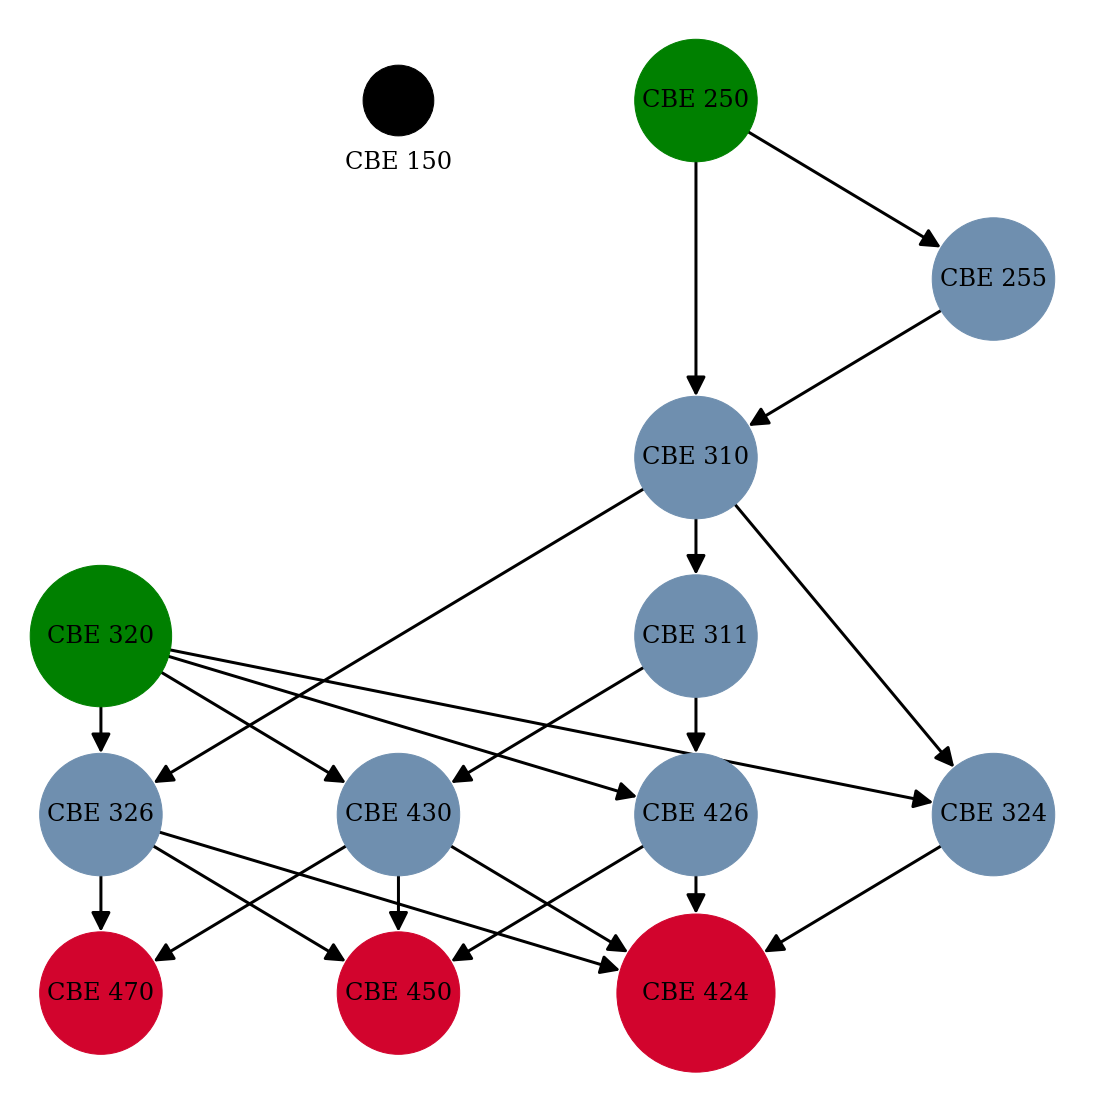

In [3]:
graph = nx.DiGraph() # initiate graph

for source, dests in edge_dict.items():
    graph.add_node(source) # add node
    for dest in dests:
        graph.add_edge(source, dest) # add edges

pos = nx.nx_agraph.graphviz_layout(graph,prog='dot') # get node layout
pos['CBE 255'] = (pos['CBE 324'][0],pos['CBE 255'][1]) # adjust position of CBE 255
pos['CBE 320'] = (pos['CBE 326'][0],pos['CBE 320'][1]) # adjust position of CBE 320

node_size = {}
label_pos = {}
node_color = {}
for node in graph.nodes:
    successors = list(graph.successors(node))
    predecessors = list(graph.predecessors(node))
    connections = len(successors) + len(predecessors)
    node_size[node] = credit_dict[node]
    label_pos[node] = (pos[node][0], pos[node][1])
    node_color[node] = '#6F8FAF' # blue if course has dependencies and prereqs
    if len(successors) == 0:
        node_color[node] = '#D2042D' # red if terminal course
    if len(predecessors) == 0:
        node_color[node] = '#008000' # green if intro course
    if connections == 0:
        node_color[node] = '#000000' # black if no dependencies or prereqs
        label_pos[node] = (pos[node][0], pos[node][1]-25)
fig = plt.figure(figsize=(15,15)) # iniiate figure
nx.draw(graph, pos, with_labels=False, node_size=[v * 5000 for v in node_size.values()], node_color=[v for v in node_color.values()],
        arrowsize=40, width=3) # draw graph
labels = nx.draw_networkx_labels(graph, label_pos, font_size=24, font_family='serif') # write labels
fig.savefig("Curriculum Graphs/Major Courses.pdf",format="pdf") # save graph

## Make Graph Interactive

In [4]:
net = Network(directed = True, notebook=True, width="1920px", height="1080px")
net.from_nx(graph)
for node in net.get_nodes():
    net.get_node(node)['x'] = pos[node][0]
    net.get_node(node)['y'] = -pos[node][1] 
    net.get_node(node)['physics'] = False
    net.get_node(node)['label'] = str(node)
    successors = list(graph.successors(node))
    predecessors = list(graph.predecessors(node))
    connections = len(successors) + len(predecessors)
    net.get_node(node)['title'] = f"Connected Componets: {connections}\nPredecessors: {predecessors}\nSuccessors: {successors}"
    net.get_node(node)['size'] = credit_dict[node] * 4
    if len(successors) == 0:
        net.get_node(node)['color'] = 'red'
    if len(predecessors) == 0:
        net.get_node(node)['color'] = 'green'
    if connections == 0:
        net.get_node(node)['color'] = 'black'  
        
net.toggle_physics(False)
net.show('Curriculum Graphs/Major Courses.html')

Curriculum Graphs/Major Courses.html
